In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import pickle
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.io as pio
import pandas_profiling as pp

In [2]:
df = pd.read_csv("train.csv")
df

Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-03-10  Female      Product   
3      fffe32003400380032003900      2008-11-03    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No          2.0                  3.0   
1                     Yes          1.0                  2.0   
2                     Yes          2.0                  NaN   
3                     Yes          1.0                  1.0   
4                      No          3.0                  7.0   
...                   ...          ...                  ...   
22745                  No          1.0                  3.0   
22746                 Yes          3.0                  6.0   
22747                 Yes          3.0                  7.0   
22748                  No          2.0                  5.0   
22749                  No          3.0                  6.0   

       Mental Fatigue Score  Burn Rate  
0                       3.8       0.16  
1                       5.0       0.36  
2                       5.8       0.49  
3                       2.6       0.20  
4                       6.9       0.52  
...                     ...        ...  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61  

[22750 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [4]:
round(df.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

Mental Fatigue Score    9.31
Resource Allocation     6.07
Burn Rate               4.94
Employee ID             0.00
Date of Joining         0.00
Gender                  0.00
Company Type            0.00
WFH Setup Available     0.00
Designation             0.00
dtype: float64

In [5]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
tt = pd.read_csv("test.csv")
ids = tt["Employee ID"]
tt.drop(["Employee ID"] , axis = 1 , inplace = True)
tt.head()

Date of Joining  Gender Company Type WFH Setup Available  Designation  \
0      2008-12-10  Female      Service                  No          2.0   
1      2008-08-14  Female      Product                 Yes          1.0   
2      2008-11-13    Male      Product                 Yes          1.0   
3      2008-02-07  Female      Service                  No          3.0   
4      2008-07-17  Female      Product                  No          2.0   

   Resource Allocation  Mental Fatigue Score  
0                  5.0                   7.7  
1                  2.0                   5.2  
2                  3.0                   5.9  
3                  6.0                   4.6  
4                  5.0                   6.4

In [7]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       12250 non-null  object 
 1   Gender                12250 non-null  object 
 2   Company Type          12250 non-null  object 
 3   WFH Setup Available   12250 non-null  object 
 4   Designation           12250 non-null  float64
 5   Resource Allocation   12250 non-null  float64
 6   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(3), object(4)
memory usage: 670.0+ KB


In [8]:
round(tt.isna().sum() * 100 / len(tt) , 2).sort_values(ascending = False)

Date of Joining         0.0
Gender                  0.0
Company Type            0.0
WFH Setup Available     0.0
Designation             0.0
Resource Allocation     0.0
Mental Fatigue Score    0.0
dtype: float64

In [9]:
# df["Date of Joining"] = pd.to_datetime(df["Date of Joining"] , format="%Y%m/%d" )
# df["date"] = df["Date of Joining"].dt.day
# df["month"] = df["Date of Joining"].dt.month
# df["year"] = df["Date of Joining"].dt.month

df["year"] = df["Date of Joining"].str.split("-").str[0].astype(int)
df["month"] = df["Date of Joining"].str.split("-").str[1].astype(int)
df["day"] = df["Date of Joining"].str.split("-").str[2].astype(int)

In [10]:
# tt["Date of Joining"] = pd.to_datetime(tt["Date of Joining"])
# tt["date"] = tt["Date of Joining"].dt.day
# tt["month"] = tt["Date of Joining"].dt.month
# tt["year"] = tt["Date of Joining"].dt.month

tt["year"] = tt["Date of Joining"].str.split("-").str[0].astype(int)
tt["month"] = tt["Date of Joining"].str.split("-").str[1].astype(int)
tt["day"] = tt["Date of Joining"].str.split("-").str[2].astype(int)

In [11]:
df.drop(["Date of Joining" , "Employee ID"] , axis = 1 , inplace = True)
tt.drop(["Date of Joining"] , axis = 1 , inplace = True)

In [12]:
df.head()

Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No          2.0                  3.0   
1    Male      Service                 Yes          1.0                  2.0   
2  Female      Product                 Yes          2.0                  NaN   
3    Male      Service                 Yes          1.0                  1.0   
4  Female      Service                  No          3.0                  7.0   

   Mental Fatigue Score  Burn Rate  year  month  day  
0                   3.8       0.16  2008      9   30  
1                   5.0       0.36  2008     11   30  
2                   5.8       0.49  2008      3   10  
3                   2.6       0.20  2008     11    3  
4                   6.9       0.52  2008      7   24

In [13]:
tt.head()

Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No          2.0                  5.0   
1  Female      Product                 Yes          1.0                  2.0   
2    Male      Product                 Yes          1.0                  3.0   
3  Female      Service                  No          3.0                  6.0   
4  Female      Product                  No          2.0                  5.0   

   Mental Fatigue Score  year  month  day  
0                   7.7  2008     12   10  
1                   5.2  2008      8   14  
2                   5.9  2008     11   13  
3                   4.6  2008      2    7  
4                   6.4  2008      7   17

In [14]:
cats = df.select_dtypes(include = "object").columns.tolist()
cats

['Gender', 'Company Type', 'WFH Setup Available']

In [15]:
ints = df.select_dtypes(exclude = "object").columns.tolist()
ints.remove("Burn Rate")
ints

['Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'year',
 'month',
 'day']

<AxesSubplot:ylabel='None'>

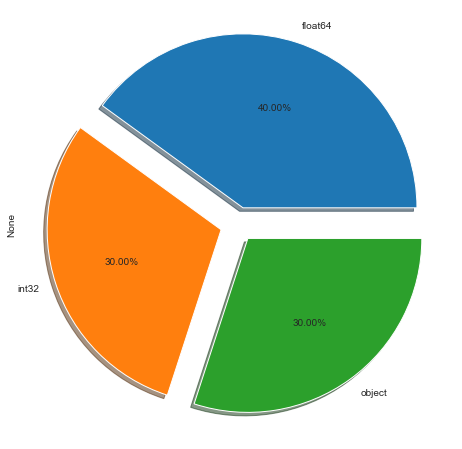

In [16]:
plt.figure(figsize = (15 , 8))
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1] , autopct='%1.2f%%' , shadow=True)

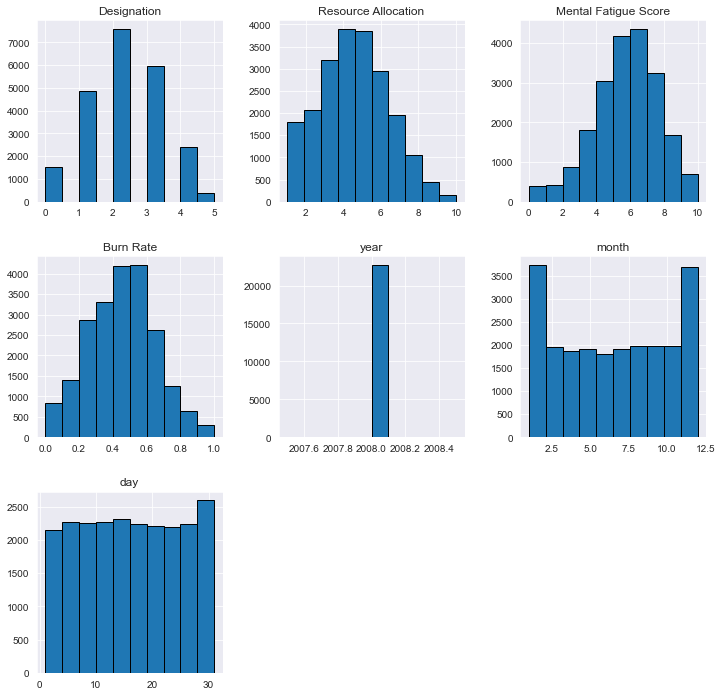

In [17]:
df.hist(edgecolor='black',figsize=(12,12));

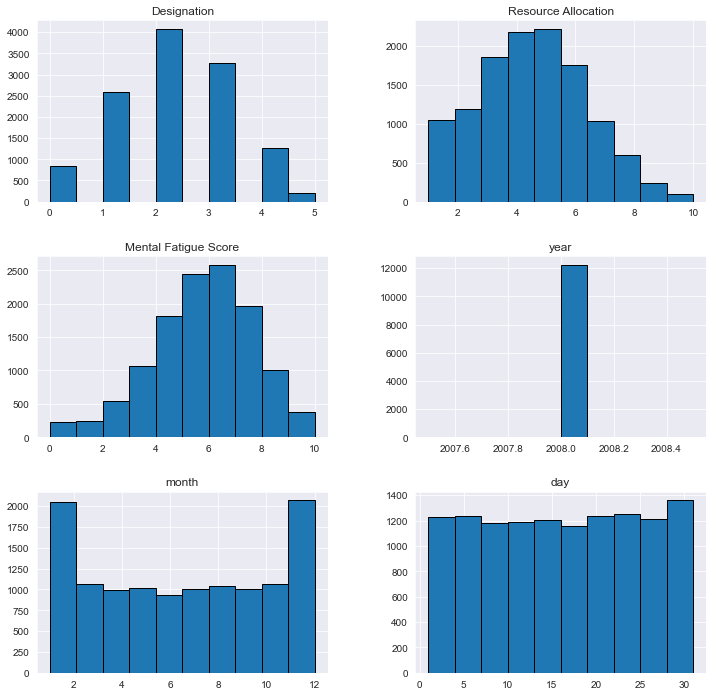

In [18]:
tt.hist(edgecolor='black',figsize=(12,12));

The number of unique values in Gender column is/are : 2


The unique values in Gender column is/are : ['Female' 'Male']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in Gender column is/are :  
Female    11908
Male      10842
Name: Gender, dtype: int64





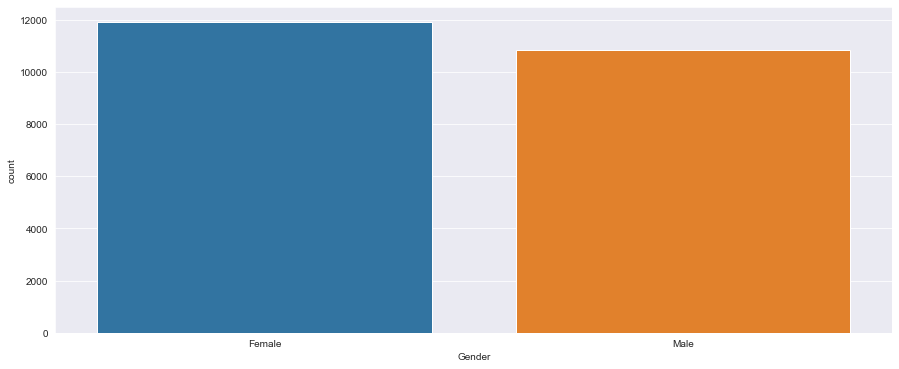

****************************************************************************************************



The number of unique values in Company Type column is/are : 2


The unique values in Company Type column is/are : ['Service' 'Product']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in Company Type column is/are :  
Service    14833
Product     7917
Name: Company Type, dtype: int64





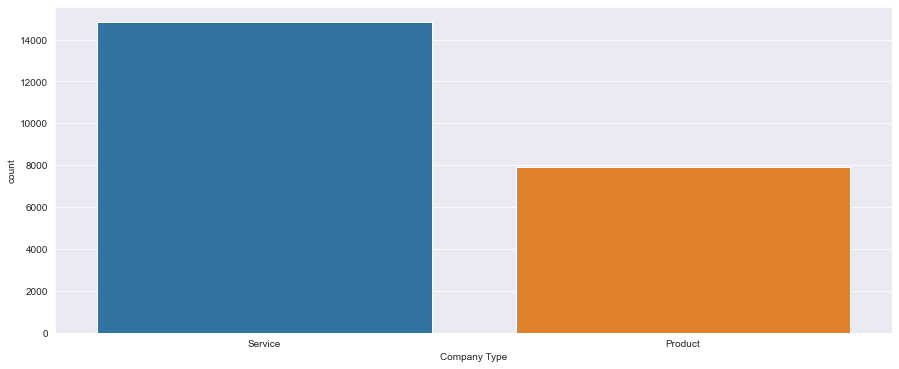

****************************************************************************************************



The number of unique values in WFH Setup Available column is/are : 2


The unique values in WFH Setup Available column is/are : ['No' 'Yes']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in WFH Setup Available column is/are :  
Yes    12290
No     10460
Name: WFH Setup Available, dtype: int64





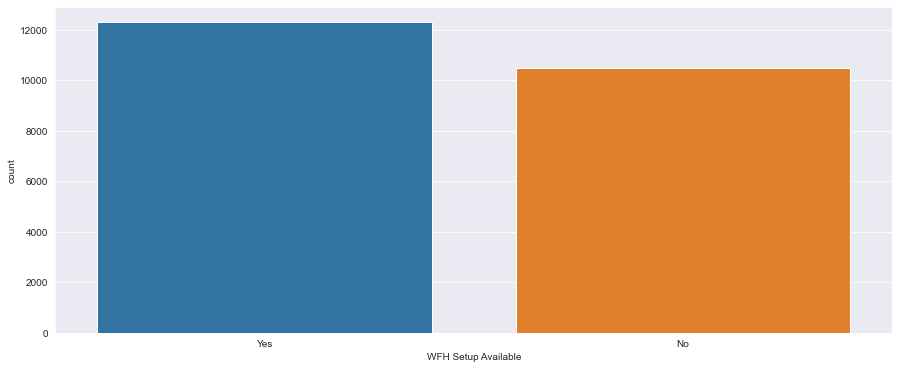

****************************************************************************************************





In [19]:
for i in cats:
    print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {df[i].unique()}")
    print("\n")
    print(f"The number of missing values are : {df[i].isna().sum()} and the percentage of {df[i].isna().sum() * 100 / len(df)} %")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    plt.figure(figsize = (15 , 6))
    sns.countplot(data = df , x = i , order = df[i].value_counts().index)
    plt.show()
    print("*"*100)
    print("\n\n")

The number of unique values in Gender column is/are : 2


The unique values in Gender column is/are : ['Female' 'Male']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in Gender column is/are :  
Female    6445
Male      5805
Name: Gender, dtype: int64





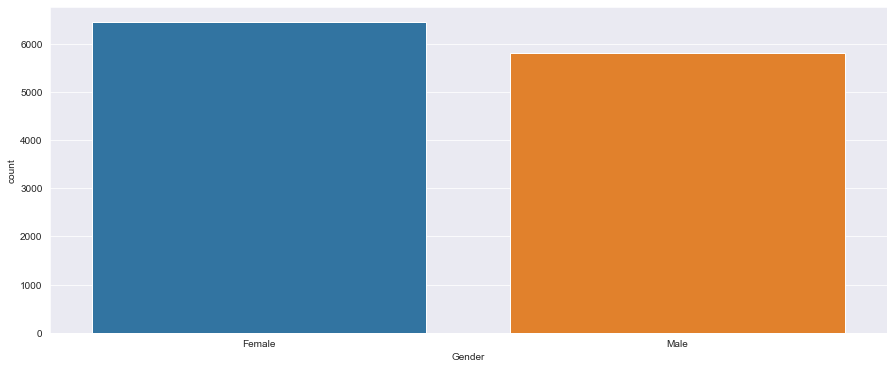

****************************************************************************************************



The number of unique values in Company Type column is/are : 2


The unique values in Company Type column is/are : ['Service' 'Product']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in Company Type column is/are :  
Service    8004
Product    4246
Name: Company Type, dtype: int64





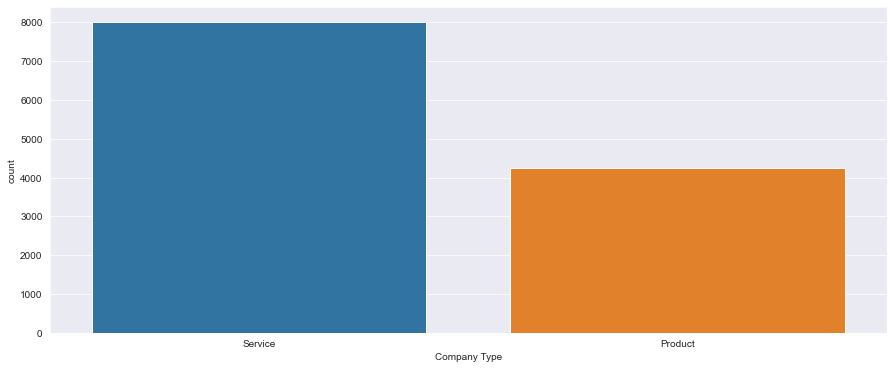

****************************************************************************************************



The number of unique values in WFH Setup Available column is/are : 2


The unique values in WFH Setup Available column is/are : ['No' 'Yes']


The number of missing values are : 0 and the percentage of 0.0 %


The value counts for each value in WFH Setup Available column is/are :  
Yes    6638
No     5612
Name: WFH Setup Available, dtype: int64





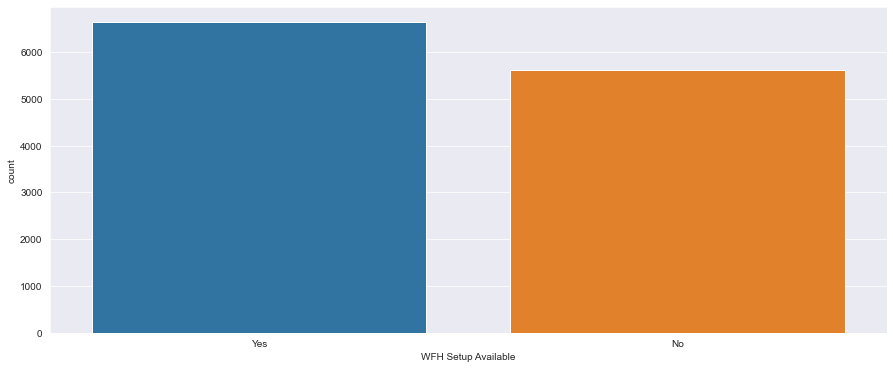

****************************************************************************************************





In [20]:
for i in cats:
    print(f"The number of unique values in {i} column is/are : {len(tt[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {tt[i].unique()}")
    print("\n")
    print(f"The number of missing values are : {tt[i].isna().sum()} and the percentage of {tt[i].isna().sum() * 100 / len(tt)} %")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{tt[i].value_counts()}")
    print("\n\n")
    plt.figure(figsize = (15 , 6))
    sns.countplot(data = tt , x = i , order = tt[i].value_counts().index)
    plt.show()
    print("*"*100)
    print("\n\n")

In [21]:
df.dropna(subset = ["Burn Rate"] , inplace = True)
df = df.reset_index(drop = True)

In [22]:
df["year"].value_counts()

2008    21626
Name: year, dtype: int64

In [23]:
tt["year"].value_counts()

2008    12250
Name: year, dtype: int64

In [24]:
df.drop(["year"] , axis = 1 , inplace = True)
tt.drop(["year"] , axis = 1 , inplace = True)

In [25]:
df.head()

Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No          2.0                  3.0   
1    Male      Service                 Yes          1.0                  2.0   
2  Female      Product                 Yes          2.0                  NaN   
3    Male      Service                 Yes          1.0                  1.0   
4  Female      Service                  No          3.0                  7.0   

   Mental Fatigue Score  Burn Rate  month  day  
0                   3.8       0.16      9   30  
1                   5.0       0.36     11   30  
2                   5.8       0.49      3   10  
3                   2.6       0.20     11    3  
4                   6.9       0.52      7   24

In [26]:
tt.head()

Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No          2.0                  5.0   
1  Female      Product                 Yes          1.0                  2.0   
2    Male      Product                 Yes          1.0                  3.0   
3  Female      Service                  No          3.0                  6.0   
4  Female      Product                  No          2.0                  5.0   

   Mental Fatigue Score  month  day  
0                   7.7     12   10  
1                   5.2      8   14  
2                   5.9     11   13  
3                   4.6      2    7  
4                   6.4      7   17

In [27]:
df.describe()

Designation  Resource Allocation  Mental Fatigue Score     Burn Rate  \
count  21626.000000         20348.000000          19681.000000  21626.000000   
mean       2.178766             4.483831              5.729851      0.452005   
std        1.135428             2.048170              1.920784      0.198226   
min        0.000000             1.000000              0.000000      0.000000   
25%        1.000000             3.000000              4.600000      0.310000   
50%        2.000000             4.000000              5.900000      0.450000   
75%        3.000000             6.000000              7.100000      0.590000   
max        5.000000            10.000000             10.000000      1.000000   

              month           day  
count  21626.000000  21626.000000  
mean       6.509017     15.756867  
std        3.441459      8.779629  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        7.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000

<AxesSubplot:>

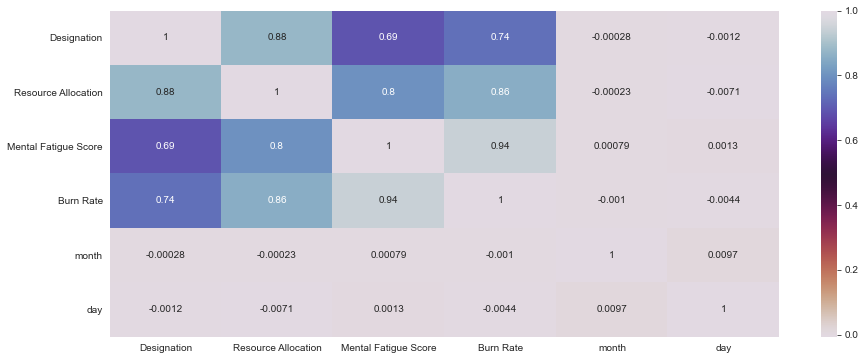

In [28]:
plt.figure(figsize = (15 , 6))
sns.heatmap(df.corr() , annot = True , cmap = "twilight_r")

In [29]:
cats

['Gender', 'Company Type', 'WFH Setup Available']

In [30]:
from sklearn.preprocessing import LabelEncoder

for i in cats:
    lb = LabelEncoder()
    df[i] = lb.fit_transform(df[i])
    tt[i] = lb.transform(tt[i])

In [31]:
df.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       0             1                    0          2.0   
1       1             1                    1          1.0   
2       0             0                    1          2.0   
3       1             1                    1          1.0   
4       0             1                    0          3.0   

   Resource Allocation  Mental Fatigue Score  Burn Rate  month  day  
0                  3.0                   3.8       0.16      9   30  
1                  2.0                   5.0       0.36     11   30  
2                  NaN                   5.8       0.49      3   10  
3                  1.0                   2.6       0.20     11    3  
4                  7.0                   6.9       0.52      7   24

In [32]:
df["Resource Allocation"].median() , df["Resource Allocation"].mean()

(4.0, 4.483831334774917)

In [33]:
df["Mental Fatigue Score"].median() , df["Mental Fatigue Score"].mean()

(5.9, 5.729851125450932)

In [34]:
df.groupby("Gender")["Mental Fatigue Score"].median()

Gender
0    5.6
1    6.2
Name: Mental Fatigue Score, dtype: float64

In [35]:
df.groupby("Company Type")["Mental Fatigue Score"].median()

Company Type
0    5.9
1    5.9
Name: Mental Fatigue Score, dtype: float64

In [36]:
df.groupby("WFH Setup Available")["Mental Fatigue Score"].median()

WFH Setup Available
0    6.6
1    5.3
Name: Mental Fatigue Score, dtype: float64

In [37]:
df.loc[957]

Gender                   1.0
Company Type             1.0
WFH Setup Available      0.0
Designation              2.0
Resource Allocation      NaN
Mental Fatigue Score     NaN
Burn Rate                0.6
month                    1.0
day                     30.0
Name: 957, dtype: float64

In [38]:
df = df.reset_index(drop = True)

In [39]:
for i in df.columns:
    if df[i].isna().sum() > 0:
        for j in list(np.where(df[i].isna())[0]):
                temp_1 = df.groupby("Gender")[i].mean()
                temp_2 = df.groupby("Company Type")[i].mean()
                temp_3 = df.groupby("WFH Setup Available")[i].mean()
                df.loc[j , i] = np.mean([temp_1[df.loc[j , "Gender"]] , temp_2[df.loc[j , "Company Type"]] , temp_3[df.loc[j , "WFH Setup Available"]]])

In [40]:
for i in tt.columns:
    if tt[i].isna().sum() > 0:
        for j in list(np.where(tt[i].isna())[0]):
                temp_1 = df.groupby("Gender")[i].mean()
                temp_2 = df.groupby("Company Type")[i].mean()
                temp_3 = df.groupby("WFH Setup Available")[i].mean()
                tt.loc[j , i] = np.mean([temp_1[df.loc[j , "Gender"]] , temp_2[df.loc[j , "Company Type"]] , temp_3[df.loc[j , "WFH Setup Available"]]])

Can also impute with median in the above cell . Since it is normally distributed , its ok to impute with mean , else we should consider median

In [41]:
df.isna().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
month                   0
day                     0
dtype: int64

In [42]:
tt.isna().sum()

Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
month                   0
day                     0
dtype: int64

<AxesSubplot:ylabel='None'>

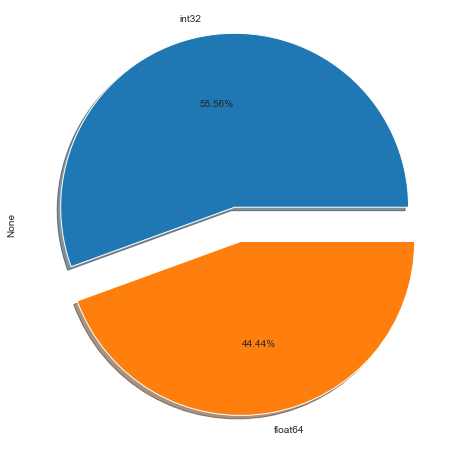

In [43]:
plt.figure(figsize = (15 , 8))
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1] , autopct='%1.2f%%' , shadow=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21626 entries, 0 to 21625
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                21626 non-null  int32  
 1   Company Type          21626 non-null  int32  
 2   WFH Setup Available   21626 non-null  int32  
 3   Designation           21626 non-null  float64
 4   Resource Allocation   21626 non-null  float64
 5   Mental Fatigue Score  21626 non-null  float64
 6   Burn Rate             21626 non-null  float64
 7   month                 21626 non-null  int32  
 8   day                   21626 non-null  int32  
dtypes: float64(4), int32(5)
memory usage: 1.1 MB


In [45]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                12250 non-null  int32  
 1   Company Type          12250 non-null  int32  
 2   WFH Setup Available   12250 non-null  int32  
 3   Designation           12250 non-null  float64
 4   Resource Allocation   12250 non-null  float64
 5   Mental Fatigue Score  12250 non-null  float64
 6   month                 12250 non-null  int32  
 7   day                   12250 non-null  int32  
dtypes: float64(3), int32(5)
memory usage: 526.5 KB


In [46]:
df.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       0             1                    0          2.0   
1       1             1                    1          1.0   
2       0             0                    1          2.0   
3       1             1                    1          1.0   
4       0             1                    0          3.0   

   Resource Allocation  Mental Fatigue Score  Burn Rate  month  day  
0             3.000000                   3.8       0.16      9   30  
1             2.000000                   5.0       0.36     11   30  
2             4.205851                   5.8       0.49      3   10  
3             1.000000                   2.6       0.20     11    3  
4             7.000000                   6.9       0.52      7   24

In [47]:
tt.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       0             1                    0          2.0   
1       0             0                    1          1.0   
2       1             0                    1          1.0   
3       0             1                    0          3.0   
4       0             0                    0          2.0   

   Resource Allocation  Mental Fatigue Score  month  day  
0                  5.0                   7.7     12   10  
1                  2.0                   5.2      8   14  
2                  3.0                   5.9     11   13  
3                  6.0                   4.6      2    7  
4                  5.0                   6.4      7   17

In [48]:
px.scatter(y = df.index , x = "Resource Allocation" , data_frame = df , color = "Burn Rate" , color_continuous_scale = "bluered")

In [49]:
px.scatter(y = df.index , x = "Mental Fatigue Score" , data_frame = df , color = "Burn Rate" , color_continuous_scale = "bluered")

No outliers in the dataset

In [50]:
X = df.drop(["Burn Rate"] , axis = 1)
y = df["Burn Rate"]

In [51]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(17300, 4326, 17300, 4326)

In [52]:
X.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       0             1                    0          2.0   
1       1             1                    1          1.0   
2       0             0                    1          2.0   
3       1             1                    1          1.0   
4       0             1                    0          3.0   

   Resource Allocation  Mental Fatigue Score  month  day  
0             3.000000                   3.8      9   30  
1             2.000000                   5.0     11   30  
2             4.205851                   5.8      3   10  
3             1.000000                   2.6     11    3  
4             7.000000                   6.9      7   24

In [53]:
ints.remove("year")
ints

['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'month', 'day']

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])
tt[ints] = scaler.transform(tt[ints])

In [55]:
X_train.head().T

2522      18530     13688     17623     16979
Gender                1.000000  1.000000  1.000000  1.000000  0.000000
Company Type          0.000000  1.000000  1.000000  0.000000  1.000000
WFH Setup Available   1.000000  0.000000  1.000000  1.000000  1.000000
Designation          -1.033729 -1.033729 -0.156183 -0.156183  1.598909
Resource Allocation  -0.242166 -0.744351 -0.744351 -0.242166  1.264387
Mental Fatigue Score -0.015372  0.150739  0.093176 -1.155123  0.907285
month                 1.305453  0.433134  1.596227 -1.311504  1.305453
day                  -0.085137  0.028748 -0.312908 -0.768449  0.825945

In [56]:
X_test.head().T

856       936       13133     9375      13734
Gender                0.000000  0.000000  1.000000  1.000000  0.000000
Company Type          0.000000  1.000000  1.000000  1.000000  1.000000
WFH Setup Available   0.000000  0.000000  1.000000  1.000000  0.000000
Designation           0.721363 -0.156183 -1.911274 -1.033729  1.598909
Resource Allocation   0.057888  0.062745 -1.748720 -0.242166  1.766572
Mental Fatigue Score  0.147450  0.527367 -2.403423  0.690189  1.938488
month                -0.439185  1.014680 -1.311504  0.433134 -1.311504
day                  -0.654564 -0.882334 -0.654564  1.509256 -1.451761

In [57]:
tt.head().T

0         1         2         3         4
Gender                0.000000  0.000000  1.000000  0.000000  0.000000
Company Type          1.000000  0.000000  0.000000  1.000000  0.000000
WFH Setup Available   0.000000  1.000000  1.000000  0.000000  0.000000
Designation          -0.156183 -1.033729 -1.033729  0.721363 -0.156183
Resource Allocation   0.260018 -1.246536 -0.744351  0.762203  0.260018
Mental Fatigue Score  1.070106 -0.286741  0.093176 -0.612384  0.364546
month                 1.596227  0.433134  1.305453 -1.311504  0.142361
day                  -0.654564 -0.199023 -0.312908 -0.996219  0.142633

In [58]:
for i in X_train.columns:
    if i not in tt.columns:
        print(i)

In [59]:
for i in tt.columns:
    if i not in X_train.columns:
        print(i)

In [60]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score

In [61]:
models = []
models.append(['XGBRegressor', XGBRegressor(random_state = 42 , objective ='reg:squarederror')])
models.append(["CatBoost Regressor" , CatBoostRegressor(random_state = 42 , verbose = 0)])
models.append(["Light GBMRegressor" , LGBMRegressor(random_state = 42)])
models.append(["Gradient Boosting" , GradientBoostingRegressor(random_state = 42)])
models.append(['RandomForest Regressor', RandomForestRegressor(random_state = 42)])
models.append(['KNeigbors Regressor', KNeighborsRegressor()])

In [62]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
#     log = mean_squared_log_error(preds , y_test)
    mse = mean_squared_error(preds , y_test , squared = False)
    mae = mean_absolute_error(preds , y_test)
    score = max(0 , 100 * r2_score(y_test , preds))
    
    print("\n")            
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Mean Absolute Error : {mae:.4f}")
    print("\n")

    print(f"Root Mean Squared Error : {mse:.4f}")
    print("\n")

#     print(f"Mean Squared Log Error : {log:.4f}")
#     print("\n")
    
    print(f"R2_score : {score:.4f}")
                
    print("\n")            
    
    plt.scatter(y_test , preds)
    x = np.linspace(min(y_test) , max(y_test) , 100)
    y = x
    plt.plot(x, y , "-r")
    plt.show()
    print("\n")

    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(mae)
    sam.append(mse)
#     sam.append(log)
    sam.append(score)
    
    return sam , mod



XGBRegressor


Training score : 0.9409


Test Score : 0.8993


K-fold accuracy : 0.9013


Standard Deviation of Accuracies in k-fold : 0.0052


Mean Absolute Error : 0.0482


Root Mean Squared Error : 0.0619


R2_score : 89.9270




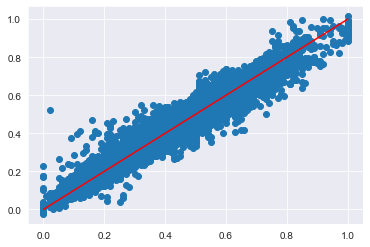



****************************************************************************************************





CatBoost Regressor


Training score : 0.9269


Test Score : 0.9056


K-fold accuracy : 0.9069


Standard Deviation of Accuracies in k-fold : 0.0051


Mean Absolute Error : 0.0470


Root Mean Squared Error : 0.0600


R2_score : 90.5563




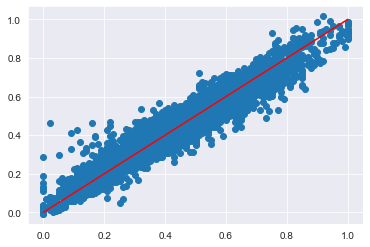



****************************************************************************************************





Light GBMRegressor


Training score : 0.9196


Test Score : 0.9069


K-fold accuracy : 0.9069


Standard Deviation of Accuracies in k-fold : 0.0048


Mean Absolute Error : 0.0469


Root Mean Squared Error : 0.0596


R2_score : 90.6888




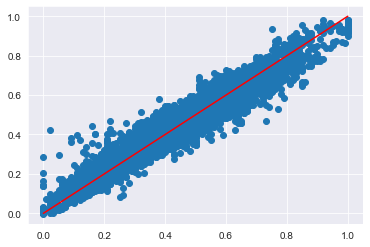



****************************************************************************************************





Gradient Boosting


Training score : 0.9037


Test Score : 0.8982


K-fold accuracy : 0.8999


Standard Deviation of Accuracies in k-fold : 0.0050


Mean Absolute Error : 0.0485


Root Mean Squared Error : 0.0623


R2_score : 89.8205




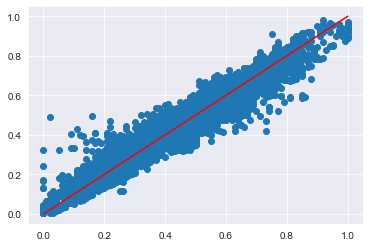



****************************************************************************************************





RandomForest Regressor


Training score : 0.9855


Test Score : 0.8971


K-fold accuracy : 0.8969


Standard Deviation of Accuracies in k-fold : 0.0049


Mean Absolute Error : 0.0488


Root Mean Squared Error : 0.0626


R2_score : 89.7059




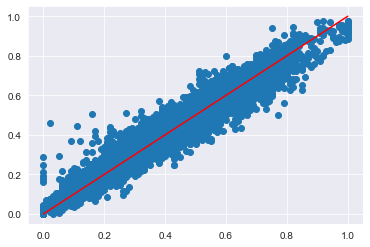



****************************************************************************************************





KNeigbors Regressor


Training score : 0.9065


Test Score : 0.8534


K-fold accuracy : 0.8580


Standard Deviation of Accuracies in k-fold : 0.0078


Mean Absolute Error : 0.0572


Root Mean Squared Error : 0.0747


R2_score : 85.3450




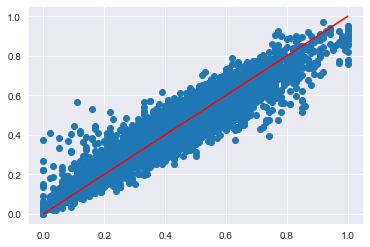



****************************************************************************************************



Wall time: 1min 50s


In [63]:
%%time

pre_final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [64]:
pre_final

[(['XGBRegressor',
   0.9409288904303396,
   0.8992698558016926,
   0.9012933092738722,
   0.005232483418691798,
   0.048153998446982614,
   0.06194070984614224,
   89.92698558016926],
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 (['CatBoost Regressor',
   0.9268922645687756,
   0.9055629082990773,
   0.9068826766530869,
   0.005096779094504891,
   0.04701785540382938,
   0.05997465415526608,
   90.55629082990772],
  <catboost.core.CatBoostRegress

In [65]:
data_pre_final = [x[0] for x in pre_final]

In [66]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "RMSE" , "R2_Score"])

me.sort_values(by = ["R2_Score" , "RMSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , False , True , False , False))
me = me.reset_index(drop = True)

me

Model  Train Score  Test Score  K-fold Accuracy  \
0      Light GBMRegressor     0.919649    0.906888         0.906913   
1      CatBoost Regressor     0.926892    0.905563         0.906883   
2            XGBRegressor     0.940929    0.899270         0.901293   
3       Gradient Boosting     0.903689    0.898205         0.899867   
4  RandomForest Regressor     0.985476    0.897059         0.896886   
5     KNeigbors Regressor     0.906453    0.853450         0.858041   

   K-fold Std       MAE      RMSE   R2_Score  
0    0.004805  0.046873  0.059552  90.688810  
1    0.005097  0.047018  0.059975  90.556291  
2    0.005232  0.048154  0.061941  89.926986  
3    0.004974  0.048537  0.062267  89.820461  
4    0.004915  0.048795  0.062617  89.705927  
5    0.007841  0.057228  0.074712  85.344963

In [67]:
from sklearn.model_selection import GridSearchCV



XGBRegressor


Best Parameters are : 
 {'learning_rate': 0.1, 'n_estimators': 100}


Training score : -0.0432


Test Score : -0.0468


K-fold accuracy : -0.0471


Standard Deviation of Accuracies in k-fold : 0.0007


Mean Absolute Error : 0.0468


Root Mean Squared Error : 0.0604


Mean Squared Log Error : 0.0018


R2_score : 90.9706




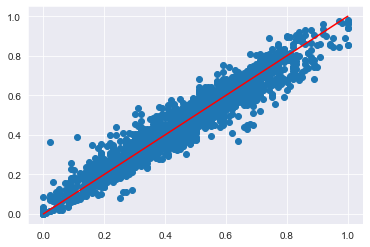



****************************************************************************************************



Wall time: 8min 33s


In [210]:
%%time

grid_xgb = {"n_estimators" : [100 , 200] , "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

xgb = metrics(['XGBRegressor', GridSearchCV(XGBRegressor(random_state = 42 , objective ='reg:squarederror') , param_grid = grid_xgb , cv = 5 , verbose = 0 , scoring = "neg_mean_absolute_error")] ,  X_train , y_train , X_test , y_test , params = True )

In [68]:
xgb = XGBRegressor(base_score=None, 
                   booster=None,
                   colsample_bylevel=None,
                   colsample_bynode=None,
                   colsample_bytree=None, gamma=None,
                   gpu_id=None, importance_type='gain',
                   interaction_constraints=None,learning_rate = 0.1 , max_delta_step=None,
                   max_depth=None, min_child_weight=None, monotone_constraints=None,
                   n_estimators=100, n_jobs=None,
                   num_parallel_tree=None, random_state=42,
                   reg_alpha=None, reg_lambda=None,
                   scale_pos_weight=None, subsample=None,
                   tree_method=None, validate_parameters=None,
                   verbosity=None)

xgb.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
max(0 , 100 * r2_score(y_test , xgb.predict(X_test)))

90.61694240444575

In [70]:
def feature_importance(model , X_train , y_train):
    features = model.feature_importances_
    temp = pd.DataFrame(list(zip(features , X_train.columns)) , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)
    plt.figure(figsize = (15 , 15))
    sns.set(font_scale = 1)
    sns.barplot(data = temp , y = "Feartures" , x = "Feature Importances")
    plt.show()
    return temp

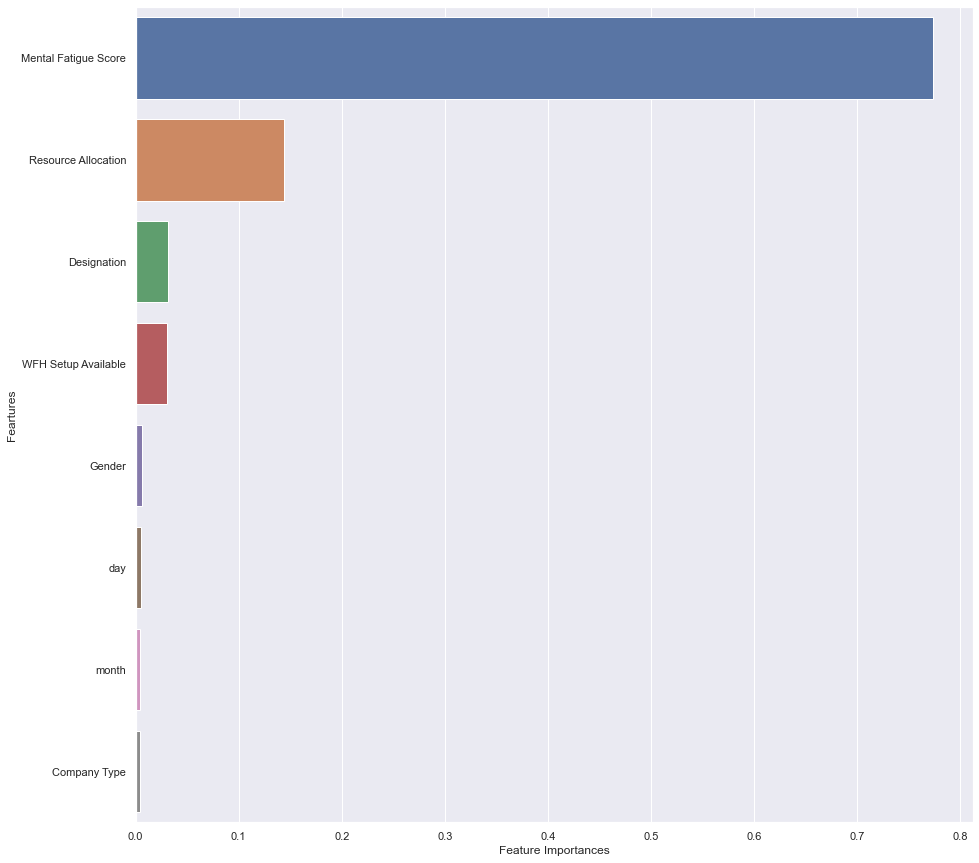

In [71]:
xgb_df = feature_importance(xgb , X_train , y_train)

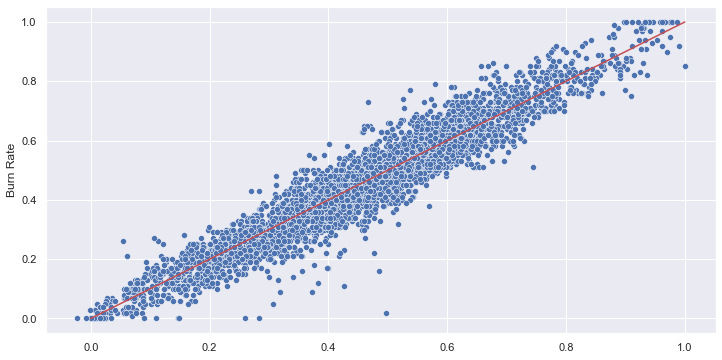

In [72]:
plt.figure(figsize = (12 , 6))
sns.scatterplot(x = xgb.predict(X_test) , y = y_test)
x = np.linspace(min(y_test) , max(y_test) , 100)
y = x
plt.plot(x, y , "-r")

<AxesSubplot:xlabel='Burn Rate', ylabel='Density'>

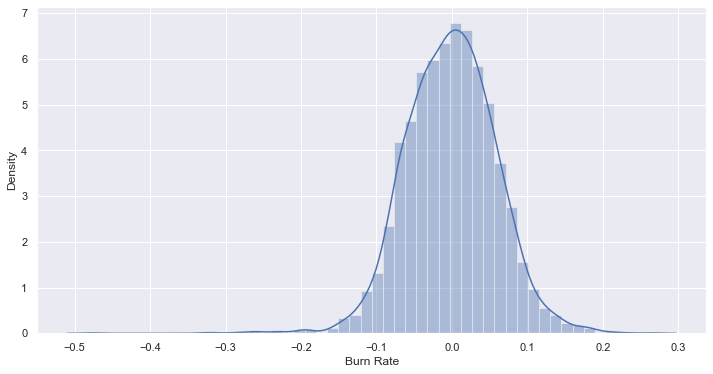

In [73]:
plt.figure(figsize = (12 , 6))
sns.distplot(y_test - xgb.predict(X_test))

In [74]:
data = {"Employee ID" : ids ,
        "Burn Rate" : xgb.predict(tt)}

In [75]:
final = pd.DataFrame(data)
final

Employee ID  Burn Rate
0      fffe31003300390039003000   0.612464
1      fffe31003300310037003800   0.350847
2      fffe33003400380035003900   0.422451
3          fffe3100370039003200   0.370910
4      fffe32003600390036003700   0.527425
...                         ...        ...
12245      fffe3900310034003700   0.414068
12246  fffe32003600330034003000   0.432905
12247  fffe31003800340039003000   0.837911
12248  fffe32003600380031003800   0.586924
12249  fffe32003100390037003800   0.126303

[12250 rows x 2 columns]

In [80]:
final.to_csv("Submission_xgb_1.csv" , index = False)

In [77]:
lgbm = pre_final[2][1]

In [79]:
max(0 , 100 * r2_score(y_test , lgbm.predict(X_test)))

90.68880992378453

In [84]:
final = pd.DataFrame({"Employee ID" : ids , "Burn Rate" : lgbm.predict(tt)})
final

Employee ID  Burn Rate
0      fffe31003300390039003000   0.613795
1      fffe31003300310037003800   0.342566
2      fffe33003400380035003900   0.417404
3          fffe3100370039003200   0.378594
4      fffe32003600390036003700   0.529927
...                         ...        ...
12245      fffe3900310034003700   0.413245
12246  fffe32003600330034003000   0.428377
12247  fffe31003800340039003000   0.840990
12248  fffe32003600380031003800   0.588112
12249  fffe32003100390037003800   0.126650

[12250 rows x 2 columns]

In [85]:
final.to_csv("Submission_lgbm_1.csv" , index = False)

## 92.8487 On XGB model , 92.8020 on LGBM model